In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [25]:
scooter_data = pd.read_csv("2019-XTern- Work Sample Assessment Data Science-DS.csv")
print(scooter_data)

       scooter_id  xcoordinate  ycoordinate  power_level
0               0     0.906835     0.776484            0
1               1     0.928587     0.804964            2
2               2     0.904091     0.784043            1
3               3     0.906752     0.804461            0
4               4     0.900641     0.781683            4
5               5     0.899680     0.790893            2
6               6     0.873765     0.808707            4
7               7     0.913476     0.789742            5
8               8     0.915256     0.790685            4
9               9     0.916273     0.785860            5
10             10     0.906847     0.805807            0
11             11     0.905919     0.811344            3
12             12     0.901493     0.791249            1
13             13     0.904264     0.797024            1
14             14     0.898657     0.799972            2
15             15     0.885372     0.780831            1
16             16     0.884462 

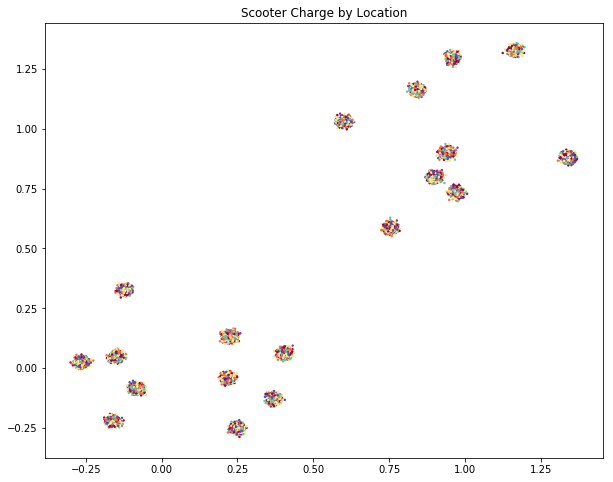

In [28]:
fig = plt.figure(figsize=(10, 8))
plt.title("Scooter Charge by Location")
plt.scatter(scooter_data.xcoordinate, scooter_data.ycoordinate, 
            c=scooter_data.power_level, cmap=plt.get_cmap("Spectral"),
            s=2)
fig.patch.set_facecolor("white")  # Set background to white for easier viewing on dark theme editors
plt.show()

## Classification by Location

From the graph, the scooters are clearly divided into 19 groups. Due to the quantity of data to classify,
and because the data has clear borders, it is an excellent candidate for K-Means classification.

In [26]:
# Convert pandas data frame to numpy vector array
data = np.asarray((scooter_data.xcoordinate, scooter_data.ycoordinate)).T 
# Estimate groups using KMeans algorithm
estimator = KMeans(n_clusters=19)
estimator.fit(data)
scooter_data.insert(len(scooter_data.columns), "group", estimator.labels_, True)

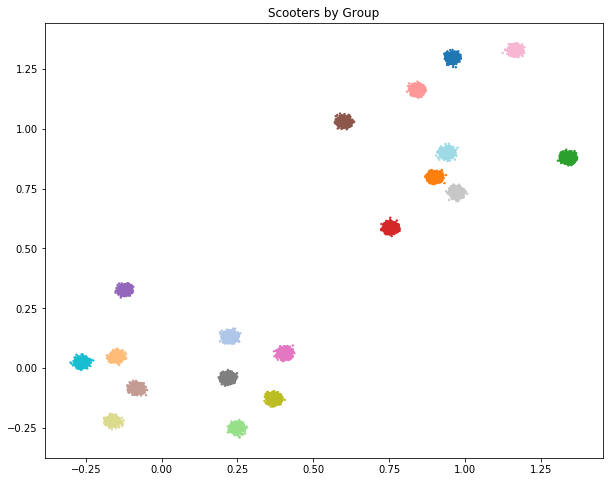

In [37]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(scooter_data.xcoordinate, scooter_data.ycoordinate, 
            c=scooter_data.group, cmap=plt.get_cmap("tab20"), 
            s=2)
plt.title("Scooters by Group")
fig.patch.set_facecolor("white")
plt.show()